In [55]:
##################################################################################################################
# 
#   Seaborn learning rate visualization example
#
#   Author: Philip Bramwell
#   Date: 20 December
# 
#   goal: 
#         * Visualize the costfunction and learning rate
#
#   Index: 
#         1. Libary Imports
#         2. Variable Definition and load Dataset
#         3. Function Defintion
#         4. Visualize Datapoints
#         5. Visualize costfunction
#
##################################################################################################################

## Imports

In [56]:
import pennylane as qml 
from pennylane import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Variables

In [57]:
# creates randomized linearly correlated datapoints 

x_values = np.random.uniform(0, 1, 500)
y_values = x_values + np.random.normal(1, 0.1, 500)

weights = [0.0, 0.0]

optimizer = qml.GradientDescentOptimizer(0.01)
optimization_steps = 10000

# Functions

In [58]:
def y_prediction(weights):
    return weights[0] * x_values + weights[1]

# mean squared error
def costfunction(weights):
    y_predicted = y_prediction(weights)
    return np.mean((y_values - y_predicted) ** 2)

# Visualize Datapoints

<AxesSubplot:>

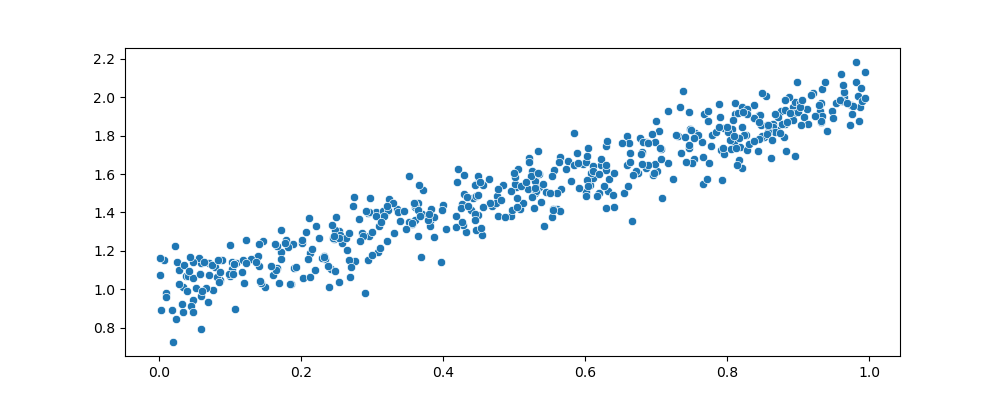

In [59]:
plt.figure(figsize=(10, 4), dpi=100)
sns.scatterplot(x=x_values, y=y_values)

## Visualize the Costfunction

(1.0193958644237495, 0.9895814415706984, tensor(0.00954069, requires_grad=True))
(1.0193958644239456, 0.9895814415705909, tensor(0.00954069, requires_grad=True))
(1.0193958644241181, 0.9895814415704965, tensor(0.00954069, requires_grad=True))
(1.01939586442427, 0.9895814415704139, tensor(0.00954069, requires_grad=True))
(1.0193958644244032, 0.9895814415703419, tensor(0.00954069, requires_grad=True))
(1.0193958644245162, 0.9895814415702785, tensor(0.00954069, requires_grad=True))
(1.0193958644246182, 0.9895814415702222, tensor(0.00954069, requires_grad=True))
(1.019395864424707, 0.9895814415701754, tensor(0.00954069, requires_grad=True))
(1.019395864424784, 0.9895814415701305, tensor(0.00954069, requires_grad=True))
(1.0193958644248506, 0.9895814415700964, tensor(0.00954069, requires_grad=True))
(1.0193958644249166, 0.9895814415700623, tensor(0.00954069, requires_grad=True))
(1.0193958644249643, 0.9895814415700327, tensor(0.00954069, requires_grad=True))
(1.0193958644250087, 0.989581441

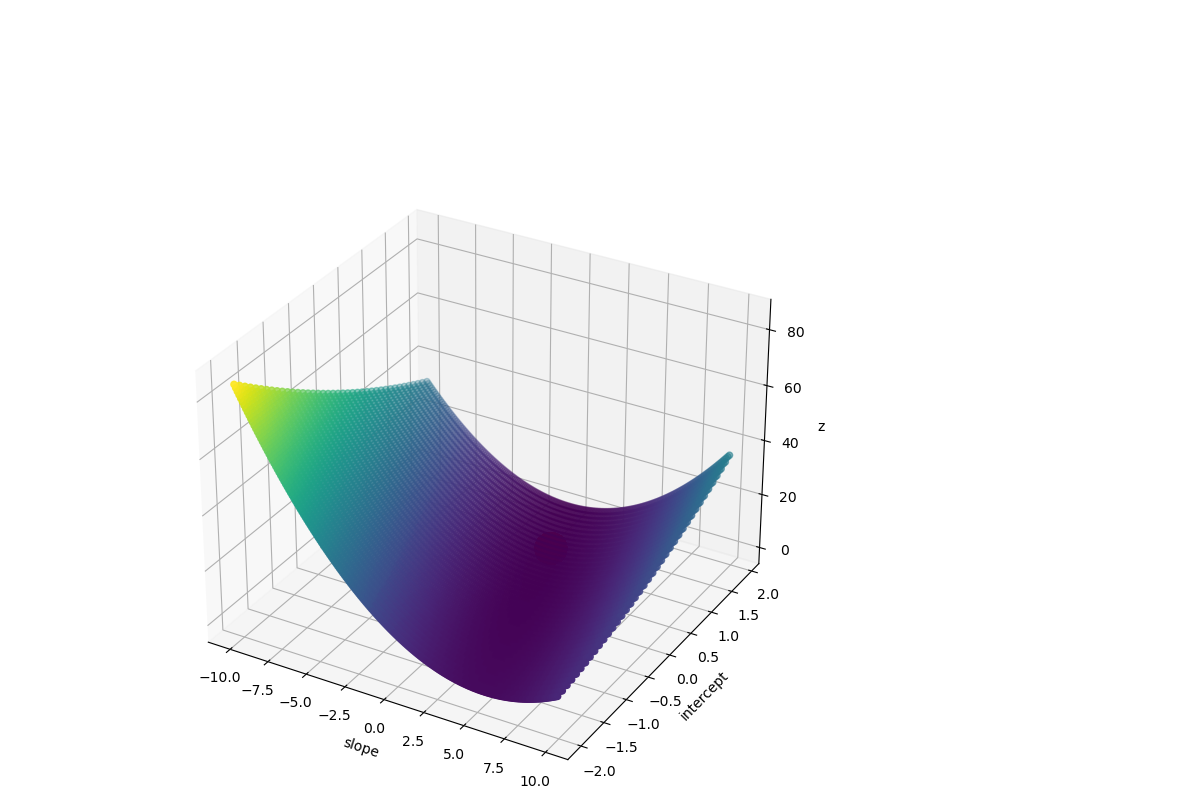

In [62]:
# %matplotlib widget

fig = plt.figure(figsize=(12, 8), dpi=100)

ax = fig.add_axes([0, 0, 0.8, 0.8], projection='3d')
ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('z')

slope_list = []
intercept_list = []
mse_list = []
weight_list_slope = []
weight_list_intercept = []
weight_list_cost = []


for step in range(optimization_steps):
    weights = optimizer.step(costfunction, weights)
    
    if step % 100 == 0:
        weight_list_slope.append(weights[0])       
        weight_list_intercept.append(weights[1])       
        
        costfunct_value = costfunction([weights[0], weights[1]])
                                       
        weight_list_cost.append(costfunct_value)
        print(f'{weights[0], weights[1], costfunction(weights)}')

for m in range(-100, 100):
    for b in range(-20, 20):
        slope_list.append(m / 10)
        intercept_list.append(b / 10)
        mse = costfunction([m / 10, b / 10])
        mse_list.append(mse)
        
ax.scatter(slope_list, intercept_list, mse_list, c=mse_list)
ax.scatter(weight_list_slope, weight_list_intercept, weight_list_cost, c='r', s=500)